In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go
%matplotlib inline

sns.set_theme(style='darkgrid')

In [2]:
# Following library was available designed to read the NOAA data.
# I initially wasted some times creating my own functions to do this job!!!

from pvlib.iotools import read_surfrad

### Data Collection

In [5]:
yr_list = ['2016', '2017', '2018', '2019']

In [6]:
locations = ['Bondville_IL', 'Boulder_CO', 'Desert_Rock_NV', 'Fort_Peck_MT', 'Goodwin_Creek_MS', 'Penn_State_PA', 'Sioux_Falls_SD']

In [3]:
location_df = pd.DataFrame({'station': ['Bondville_IL', 'Boulder_CO', 'Desert_Rock_NV', 'Fort_Peck_MT', 'Goodwin_Creek_MS', 'Penn_State_PA', 'Sioux_Falls_SD'],
                           'lat': [40.05, 40.125, 36.624, 48.31, 34.25, 40.72, 43.73],
                           'lon': [-88.37, -105.237, -116.019, -107.10, -89.87, -77.93, -96.62],
                           'altitude_in_m': [213, 1689, 1007, 634, 98, 376, 473]
                            })
location_df

station     lat      lon  altitude_in_m
0      Bondville_IL  40.050  -88.370            213
1        Boulder_CO  40.125 -105.237           1689
2    Desert_Rock_NV  36.624 -116.019           1007
3      Fort_Peck_MT  48.310 -107.100            634
4  Goodwin_Creek_MS  34.250  -89.870             98
5     Penn_State_PA  40.720  -77.930            376
6    Sioux_Falls_SD  43.730  -96.620            473

In [4]:
def location_map(df, title):
    fig = px.scatter_mapbox(df, lat='lat', lon='lon',
                            color = 'station',                            
                            size_max=5,
                            zoom = 2,
                            height = 500,
                            title = title,
                            hover_data = {'lat':True,
                                          'lon':True,
                                          'altitude_in_m':True}
                           )
    fig.update_layout(mapbox_style="carto-positron")
    fig.show()

In [5]:
location_map(location_df, title='Location of the stations')

In [6]:
columns_list = ['year', 'jday', 'month', 'day', 'hour', 'min', 'dt', 'zen', 'dw_solar', 'uw_solar', 'direct_n', 'diffuse', 'dw_ir', 
           'dw_casetemp', 'dw_dometemp', 'uw_irl', 'uw_casetemp', 'uw_dometemp', 'uvb', 'par', 'netsolar', 'netir', 
           'totalnet', 'temp', 'rh', 'windspd', 'winddir', 'pressure']

locations = ['Bondville_IL', 'Boulder_CO', 'Desert_Rock_NV', 'Fort_Peck_MT', 'Goodwin_Creek_MS', 'Penn_State_PA', 'Sioux_Falls_SD']

### Read in all the data and merge into single dataframe by year per location

In [14]:
def merge_df(filenames):
    '''
    Simple function to merge all the dataframes by year
    'read_surfrad' function gives two outputs, a dataframe and a metadata.
    '''   
    df_list = []   
    for filename in filenames:
        df, _ = read_surfrad(filename, map_variables=True)
        df_list.append(df)        

    frame = pd.concat(df_list, axis=0, ignore_index=True)
    return frame

In [6]:
# Load Data which are individual file per day per locations, merge them into single dataframe per locations
# We will create a dictionary per location
# We will use 2020 data for Training Set

import glob

year = 2020  
df_train_merge_2020 = {}
for location in locations:
    print(f"Starting dataframe collection from {location} ...")
    
    path = f"D:/Machine_Learning/NOAA/surfrad/{location}/{year}/"
    filenames = glob.glob(path + "/*.dat")
    
    df_train_merge[location] = merge_df(filenames)
print("Done!")

Starting dataframe collection from Bondville_IL ...
Starting dataframe collection from Boulder_CO ...
Starting dataframe collection from Desert_Rock_NV ...
Starting dataframe collection from Fort_Peck_MT ...
Starting dataframe collection from Goodwin_Creek_MS ...
Starting dataframe collection from Penn_State_PA ...
Starting dataframe collection from Sioux_Falls_SD ...
Done!


In [7]:
# Similarly we create a dictionary for test dataset from 2021
# Later on we will split 2021 into validation and test set as well

year = 2021  
df_test_merge = {}
for location in locations:
    print(f"Starting dataframe collection from {location} ...")
    
    path = f"D:/Machine_Learning/NOAA/surfrad/{location}/{year}/"
    filenames = glob.glob(path + "/*.dat")
    
    df_test_merge[location] = merge_df(filenames)
print("Done!")

Starting dataframe collection from Bondville_IL ...
Starting dataframe collection from Boulder_CO ...
Starting dataframe collection from Desert_Rock_NV ...
Starting dataframe collection from Fort_Peck_MT ...
Starting dataframe collection from Goodwin_Creek_MS ...
Starting dataframe collection from Penn_State_PA ...
Starting dataframe collection from Sioux_Falls_SD ...
Done!


In [24]:
df_train_merge['Bondville_IL'].year.value_counts()

2020    527039
Name: year, dtype: int64

In [9]:
df_test_merge['Bondville_IL'].head()

year  jday  month  day  hour  minute     dt  solar_zenith  ghi  ghi_flag  \
0  2021     1      1    1     0       0  0.000        105.03 -0.8         0   
1  2021     1      1    1     0       1  0.017        105.21 -0.8         0   
2  2021     1      1    1     0       2  0.033        105.39 -0.8         0   
3  2021     1      1    1     0       3  0.050        105.58 -0.8         0   
4  2021     1      1    1     0       4  0.067        105.76 -0.8         0   

   ...  temp_air  temp_air_flag  relative_humidity  relative_humidity_flag  \
0  ...      -2.2              0               84.7                       0   
1  ...      -2.2              0               84.4                       0   
2  ...      -2.2              0               84.6                       0   
3  ...      -2.2              0               83.6                       0   
4  ...      -2.3              0               84.5                       0   

   wind_speed  wind_speed_flag  wind_direction  wind_direction_flag  pressure  \
0         4.2                0            91.4                    0    1000.1   
1         5.5                0            86.4                    0    1000.1   
2         5.1                0            91.6                    0    1000.0   
3         5.6                0            88.5                    0    1000.0   
4         3.8                0            77.0                    0    1000.0   

   pressure_flag  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 48 columns]

### Export data to csv
Now its time to export individial dataframe per lcoation per year to csv file for future import.
Dataset has been analyzed to sort out the features to be used for the modeling part!!!
The features with tage '-flag' will be dropped.

In [124]:
df_train_merge['Bondville_IL'].columns

Index(['year', 'jday', 'month', 'day', 'hour', 'minute', 'dt', 'solar_zenith',
       'ghi', 'ghi_flag', 'uw_solar', 'uw_solar_flag', 'dni', 'dni_flag',
       'dhi', 'dhi_flag', 'dw_ir', 'dw_ir_flag', 'dw_casetemp',
       'dw_casetemp_flag', 'dw_dometemp', 'dw_dometemp_flag', 'uw_ir',
       'uw_ir_flag', 'uw_casetemp', 'uw_casetemp_flag', 'uw_dometemp',
       'uw_dometemp_flag', 'uvb', 'uvb_flag', 'par', 'par_flag', 'netsolar',
       'netsolar_flag', 'netir', 'netir_flag', 'totalnet', 'totalnet_flag',
       'temp_air', 'temp_air_flag', 'relative_humidity',
       'relative_humidity_flag', 'wind_speed', 'wind_speed_flag',
       'wind_direction', 'wind_direction_flag', 'pressure', 'pressure_flag'],
      dtype='object')

In [112]:
cols_to_drop = ['ghi_flag', 'uw_solar_flag', 
                'dni_flag', 'dhi_flag', 'dw_ir_flag', 'dw_casetemp', 'dw_casetemp_flag', 
                'dw_dometemp', 'dw_dometemp_flag', 'uw_ir_flag', 'uw_casetemp', 'uw_casetemp_flag', 
                'uw_dometemp', 'uw_dometemp_flag', 'uvb_flag', 'par_flag', 'netsolar_flag', 'netir_flag', 
                'totalnet_flag', 'temp_air_flag', 'relative_humidity_flag', 'wind_speed', 
                'wind_speed_flag', 'wind_direction', 'wind_direction_flag', 'pressure_flag']

In [11]:
df_train = {}
df_test = {}
for location in locations:    
    df_train[location] = df_train_merge[location].drop(columns = cols_to_drop) 
    df_test[location] = df_test_merge[location].drop(columns = cols_to_drop)  
    
    print(f"Writing surfrad_{location}.csv")
    df_train[location].to_csv(r'D:/Machine_Learning/NOAA/surfrad/to_csv/df_train_' + location + '.csv')
    df_test[location].to_csv(r'D:/Machine_Learning/NOAA/surfrad/to_csv/df_test_' + location + '.csv')
print("Done!")

Writing surfrad_Bondville_IL.csv
Writing surfrad_Boulder_CO.csv
Writing surfrad_Desert_Rock_NV.csv
Writing surfrad_Fort_Peck_MT.csv
Writing surfrad_Goodwin_Creek_MS.csv
Writing surfrad_Penn_State_PA.csv
Writing surfrad_Sioux_Falls_SD.csv
Done!


### Data Exploration

Notice, when we read just one file, the read_surfrad() function output the dataframe with datetime index.
However, in the merge operation, we lost the datetime index. Below is the exact function used inside the 
read_surfrad() module which we will recall again to re-index the data with datetime format.

In [14]:
def format_index(data):
    """Create UTC localized DatetimeIndex for the dataframe.
    Parameters
    ----------
    data: Dataframe
        Must contain columns 'year', 'jday', 'hour' and
        'minute'.
    Return
    ------
    data: Dataframe
        Dataframe with a DatetimeIndex localized to UTC.
    """
    year = data.year.apply(str)
    jday = data.jday.apply(lambda x: '{:03d}'.format(x))
    hours = data.hour.apply(lambda x: '{:02d}'.format(x))
    minutes = data.minute.apply(lambda x: '{:02d}'.format(x))
    index = pd.to_datetime(year + jday + hours + minutes, format="%Y%j%H%M")
    data.index = index
    data = data.tz_localize('UTC')
    return data

In [15]:
df_all = {}
for location in locations:    
    df_all[location] = format_index(df_train_merge[location])    

In [18]:
df_all['Bondville_IL'].shape

(527039, 48)

In [20]:
# Test resampling

df_all['Bondville_IL'].resample('H').mean().head()

year  jday  month  day  hour  minute        dt  \
2020-01-01 00:00:00+00:00  2020.0   1.0    1.0  1.0   0.0    29.5  0.491667   
2020-01-01 01:00:00+00:00  2020.0   1.0    1.0  1.0   1.0    29.5  1.491667   
2020-01-01 02:00:00+00:00  2020.0   1.0    1.0  1.0   2.0    29.5  2.491667   
2020-01-01 03:00:00+00:00  2020.0   1.0    1.0  1.0   3.0    29.5  3.491667   
2020-01-01 04:00:00+00:00  2020.0   1.0    1.0  1.0   4.0    29.5  4.491667   

                           solar_zenith   ghi  ghi_flag  ...  temp_air  \
2020-01-01 00:00:00+00:00    110.584667 -1.20       0.0  ...  0.355000   
2020-01-01 01:00:00+00:00    121.897667 -1.20       0.0  ...  0.541667   
2020-01-01 02:00:00+00:00    133.347000 -1.20       0.0  ...  0.638333   
2020-01-01 03:00:00+00:00    144.562667 -1.20       0.0  ...  0.885000   
2020-01-01 04:00:00+00:00    154.754833 -1.19       0.0  ...  0.656667   

                           temp_air_flag  relative_humidity  \
2020-01-01 00:00:00+00:00            0.0          82.268333   
2020-01-01 01:00:00+00:00            0.0          83.746667   
2020-01-01 02:00:00+00:00            0.0          85.386667   
2020-01-01 03:00:00+00:00            0.0          84.965000   
2020-01-01 04:00:00+00:00            0.0          87.150000   

                           relative_humidity_flag  wind_speed  \
2020-01-01 00:00:00+00:00                     0.0    5.993333   
2020-01-01 01:00:00+00:00                     0.0    5.398333   
2020-01-01 02:00:00+00:00                     0.0    5.028333   
2020-01-01 03:00:00+00:00                     0.0    5.238333   
2020-01-01 04:00:00+00:00                     0.0    4.540000   

                           wind_speed_flag  wind_direction  \
2020-01-01 00:00:00+00:00              0.0      269.825000   
2020-01-01 01:00:00+00:00              0.0      254.840000   
2020-01-01 02:00:00+00:00              0.0      251.223333   
2020-01-01 03:00:00+00:00              0.0      260.940000   
2020-01-01 04:00:00+00:00              0.0      256.940000   

                           wind_direction_flag    pressure  pressure_flag  
2020-01-01 00:00:00+00:00                  0.0  986.835000            0.0  
2020-01-01 01:00:00+00:00                  0.0  986.938333            0.0  
2020-01-01 02:00:00+00:00                  0.0  986.918333            0.0  
2020-01-01 03:00:00+00:00                  0.0  986.796667            0.0  
2020-01-01 04:00:00+00:00                  0.0  986.810000            0.0  

[5 rows x 48 columns]

In [62]:
for location in locations:
    print(df_all[location].isna().sum())

year                          0
jday                          0
month                         0
day                           0
hour                          0
minute                        0
dt                            0
solar_zenith                  0
ghi                        3121
ghi_flag                      0
uw_solar                    232
uw_solar_flag                 0
dni                        1559
dni_flag                      0
dhi                         676
dhi_flag                      0
dw_ir                      1746
dw_ir_flag                    0
dw_casetemp                   0
dw_casetemp_flag              0
dw_dometemp                   2
dw_dometemp_flag              0
uw_ir                      8966
uw_ir_flag                    0
uw_casetemp                1164
uw_casetemp_flag              0
uw_dometemp                1164
uw_dometemp_flag              0
uvb                          96
uvb_flag                      0
par                        3001
par_flag

In [ ]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df_train_merge['Bondville'].index,
                        y=df_train_merge['Bondville'].netsolar,
                        name='Training Data'),       
              )

fig.update_layout(title='Net Solar Radiation')

fig.show()

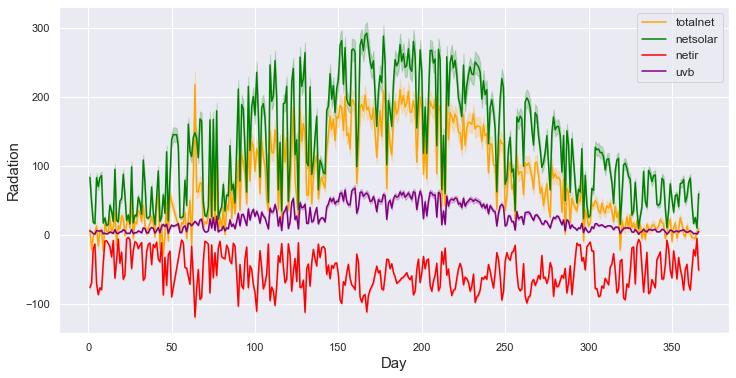

In [54]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='totalnet', color='orange')
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='netsolar', color='green')
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='netir', color='red')
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='uvb', color='purple')             

plt.xlabel('Day', fontsize=15)
plt.ylabel('Radation', fontsize=15)
plt.legend(['totalnet', 'netsolar', 'netir', 'uvb'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

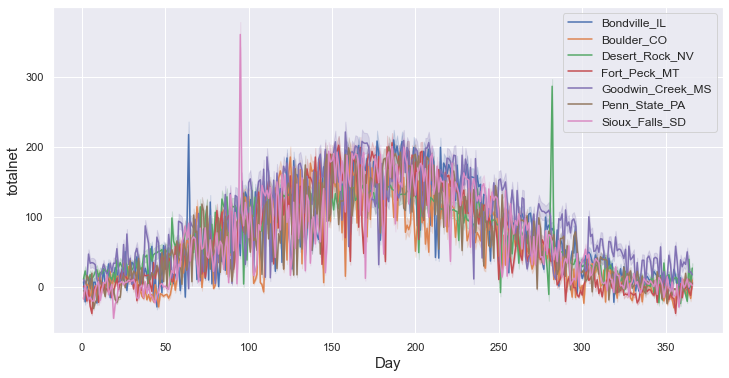

In [65]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='totalnet')
sns.lineplot(data=df_all['Boulder_CO'], x='jday', y='totalnet')
sns.lineplot(data=df_all['Desert_Rock_NV'], x='jday', y='totalnet')
sns.lineplot(data=df_all['Fort_Peck_MT'], x='jday', y='totalnet')    
sns.lineplot(data=df_all['Goodwin_Creek_MS'], x='jday', y='totalnet')
sns.lineplot(data=df_all['Penn_State_PA'], x='jday', y='totalnet')
sns.lineplot(data=df_all['Sioux_Falls_SD'], x='jday', y='totalnet')  

plt.xlabel('Day', fontsize=15)
plt.ylabel('totalnet', fontsize=15)
plt.legend(locations, fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

In [76]:
#Three stations have anomalous outliers!
print(df_all['Bondville_IL'].groupby('jday').mean().totalnet.max())
print(df_all['Desert_Rock_NV'].groupby('jday').mean().totalnet.max())
print(df_all['Sioux_Falls_SD'].groupby('jday').mean().totalnet.max())

218.0204433497539
287.00466926070015
360.9348189415044


In [43]:
df_all['Bondville_IL'].columns

Index(['year', 'jday', 'month', 'day', 'hour', 'minute', 'dt', 'solar_zenith',
       'ghi', 'ghi_flag', 'uw_solar', 'uw_solar_flag', 'dni', 'dni_flag',
       'dhi', 'dhi_flag', 'dw_ir', 'dw_ir_flag', 'dw_casetemp',
       'dw_casetemp_flag', 'dw_dometemp', 'dw_dometemp_flag', 'uw_ir',
       'uw_ir_flag', 'uw_casetemp', 'uw_casetemp_flag', 'uw_dometemp',
       'uw_dometemp_flag', 'uvb', 'uvb_flag', 'par', 'par_flag', 'netsolar',
       'netsolar_flag', 'netir', 'netir_flag', 'totalnet', 'totalnet_flag',
       'temp_air', 'temp_air_flag', 'relative_humidity',
       'relative_humidity_flag', 'wind_speed', 'wind_speed_flag',
       'wind_direction', 'wind_direction_flag', 'pressure', 'pressure_flag'],
      dtype='object')

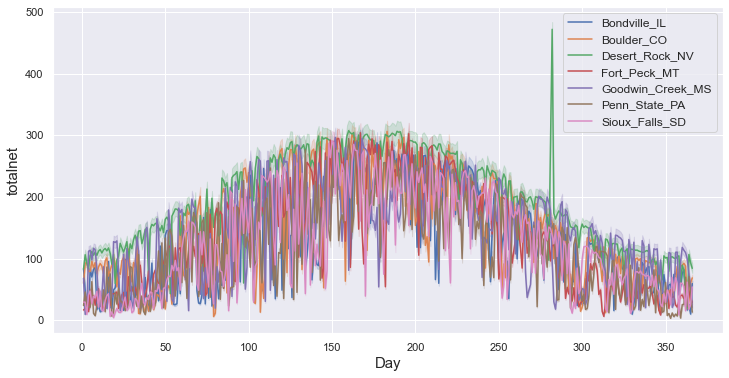

In [77]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='netsolar')
sns.lineplot(data=df_all['Boulder_CO'], x='jday', y='netsolar')
sns.lineplot(data=df_all['Desert_Rock_NV'], x='jday', y='netsolar')
sns.lineplot(data=df_all['Fort_Peck_MT'], x='jday', y='netsolar')    
sns.lineplot(data=df_all['Goodwin_Creek_MS'], x='jday', y='netsolar')
sns.lineplot(data=df_all['Penn_State_PA'], x='jday', y='netsolar')
sns.lineplot(data=df_all['Sioux_Falls_SD'], x='jday', y='netsolar')  

plt.xlabel('Day', fontsize=15)
plt.ylabel('totalnet', fontsize=15)
plt.legend(locations, fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

<AxesSubplot:xlabel='jday', ylabel='wind_direction'>

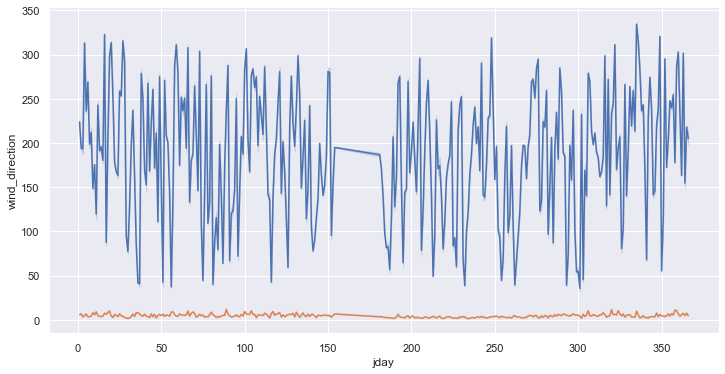

In [83]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='wind_direction')
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='wind_speed')

<AxesSubplot:xlabel='jday', ylabel='totalnet'>

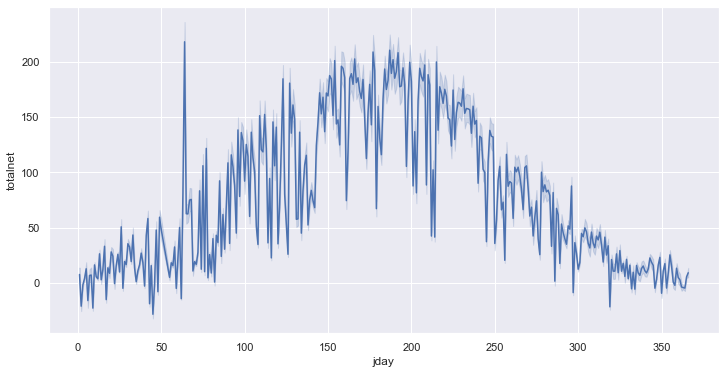

In [69]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='totalnet')
# sns.lineplot(data=df_all['Desert_Rock_NV'], x='jday', y='totalnet')
# sns.lineplot(data=df_all['Sioux_Falls_SD'], x='jday', y='totalnet')  

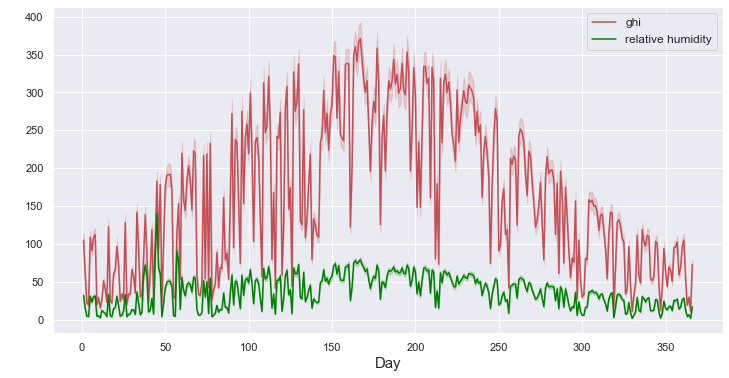

In [60]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='ghi', color='r')
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='uw_solar', color='green')

plt.xlabel('Day', fontsize=15)
plt.ylabel(' ', fontsize=15)
plt.legend(['ghi', 'relative humidity'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

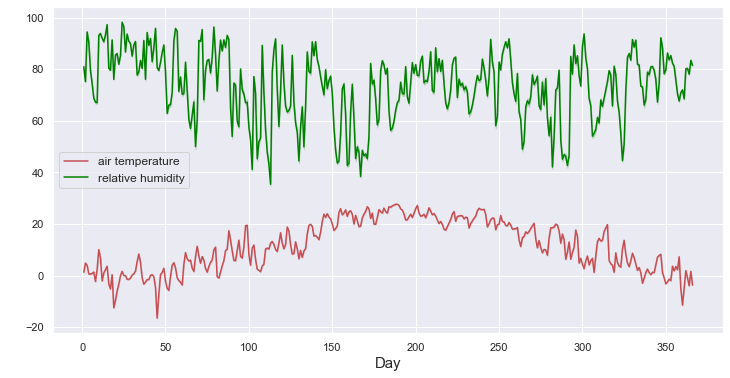

In [53]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='temp_air', color='r')
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='relative_humidity', color='green')

plt.xlabel('Day', fontsize=15)
plt.ylabel(' ', fontsize=15)
plt.legend(['air temperature', 'relative humidity'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

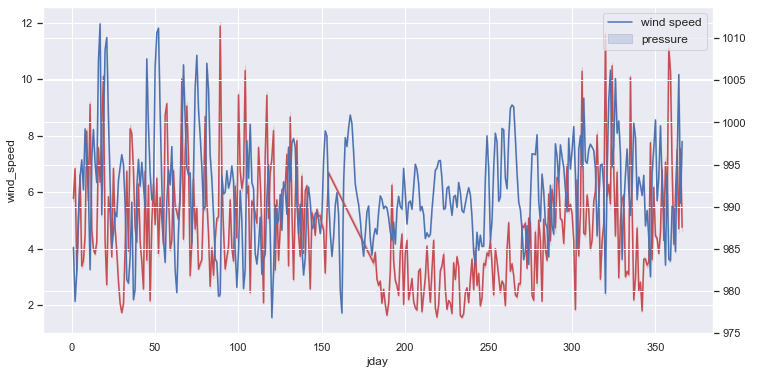

In [58]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='wind_speed', color='r')
ax2 = ax.twinx()
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='pressure', color='b', ax=ax2)

plt.xlabel('Day', fontsize=15)
plt.ylabel(' ', fontsize=15)
plt.legend(['wind speed', 'pressure'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

In [80]:
df_all['Bondville_IL'].replace(to_replace=-9999.9, value=np.nan).isna().sum()

year                          0
jday                          0
month                         0
day                           0
hour                          0
minute                        0
dt                            0
solar_zenith                  0
ghi                        3121
ghi_flag                      0
uw_solar                    232
uw_solar_flag                 0
dni                        1559
dni_flag                      0
dhi                         676
dhi_flag                      0
dw_ir                      1746
dw_ir_flag                    0
dw_casetemp                   0
dw_casetemp_flag              0
dw_dometemp                   2
dw_dometemp_flag              0
uw_ir                      8966
uw_ir_flag                    0
uw_casetemp                1164
uw_casetemp_flag              0
uw_dometemp                1164
uw_dometemp_flag              0
uvb                          96
uvb_flag                      0
par                        3001
par_flag

## Appendix

In [ ]:
# Add more historic data from 2016 to 2020
# Have to run this manually for each year
year = 2020  # 2020 for Training Set
df_train_merge_2020 = {}
for location in locations:
    print(f"Starting dataframe collection from {location} ...")
    
    path = f"D:/Machine_Learning/NOAA/surfrad/{location}/{year}/"
    filenames = glob.glob(path + "/*.dat")
    
    df_train_merge_2020[location] = merge_df(filenames)
print("Done!")

In [ ]:

df_resample_Bondville_IL = []
df_resample_Bondville_IL.append(format_index(df_train_merge_2016['Bondville_IL']))
df_resample_Bondville_IL.append(format_index(df_train_merge_2017['Bondville_IL']))
df_resample_Bondville_IL.append(format_index(df_train_merge_2018['Bondville_IL']))
df_resample_Bondville_IL.append(format_index(df_train_merge_2019['Bondville_IL']))
df_resample_Bondville_IL.append(format_index(df_train_merge_2020['Bondville_IL']))

df_resample_Boulder_CO = []
df_resample_Boulder_CO.append(format_index(df_train_merge_2016['Boulder_CO']))
df_resample_Boulder_CO.append(format_index(df_train_merge_2017['Boulder_CO']))
df_resample_Boulder_CO.append(format_index(df_train_merge_2018['Boulder_CO']))
df_resample_Boulder_CO.append(format_index(df_train_merge_2019['Boulder_CO']))
df_resample_Boulder_CO.append(format_index(df_train_merge_2020['Boulder_CO']))

df_resample_Desert_Rock_NV = []
df_resample_Desert_Rock_NV.append(format_index(df_train_merge_2016['Desert_Rock_NV']))
df_resample_Desert_Rock_NV.append(format_index(df_train_merge_2017['Desert_Rock_NV']))
df_resample_Desert_Rock_NV.append(format_index(df_train_merge_2018['Desert_Rock_NV']))
df_resample_Desert_Rock_NV.append(format_index(df_train_merge_2019['Desert_Rock_NV']))
df_resample_Desert_Rock_NV.append(format_index(df_train_merge_2020['Desert_Rock_NV']))

df_resample_Fort_Peck_MT = []
df_resample_Fort_Peck_MT.append(format_index(df_train_merge_2016['Fort_Peck_MT']))
df_resample_Fort_Peck_MT.append(format_index(df_train_merge_2017['Fort_Peck_MT']))
df_resample_Fort_Peck_MT.append(format_index(df_train_merge_2018['Fort_Peck_MT']))
df_resample_Fort_Peck_MT.append(format_index(df_train_merge_2019['Fort_Peck_MT']))
df_resample_Fort_Peck_MT.append(format_index(df_train_merge_2020['Fort_Peck_MT']))

df_resample_Goodwin_Creek_MS = []
df_resample_Goodwin_Creek_MS.append(format_index(df_train_merge_2016['Goodwin_Creek_MS']))
df_resample_Goodwin_Creek_MS.append(format_index(df_train_merge_2017['Goodwin_Creek_MS']))
df_resample_Goodwin_Creek_MS.append(format_index(df_train_merge_2018['Goodwin_Creek_MS']))
df_resample_Goodwin_Creek_MS.append(format_index(df_train_merge_2019['Goodwin_Creek_MS']))
df_resample_Goodwin_Creek_MS.append(format_index(df_train_merge_2020['Goodwin_Creek_MS']))

df_resample_Penn_State_PA = []
df_resample_Penn_State_PA.append(format_index(df_train_merge_2016['Penn_State_PA']))
df_resample_Penn_State_PA.append(format_index(df_train_merge_2017['Penn_State_PA']))
df_resample_Penn_State_PA.append(format_index(df_train_merge_2018['Penn_State_PA']))
df_resample_Penn_State_PA.append(format_index(df_train_merge_2019['Penn_State_PA']))
df_resample_Penn_State_PA.append(format_index(df_train_merge_2020['Penn_State_PA']))

df_resample_Sioux_Falls_SD = []
df_resample_Sioux_Falls_SD.append(format_index(df_train_merge_2016['Sioux_Falls_SD']))
df_resample_Sioux_Falls_SD.append(format_index(df_train_merge_2017['Sioux_Falls_SD']))
df_resample_Sioux_Falls_SD.append(format_index(df_train_merge_2018['Sioux_Falls_SD']))
df_resample_Sioux_Falls_SD.append(format_index(df_train_merge_2019['Sioux_Falls_SD']))
df_resample_Sioux_Falls_SD.append(format_index(df_train_merge_2020['Sioux_Falls_SD']))

In [ ]:
Bondville_IL = pd.concat(df_resample_Bondville_IL, axis=0, ignore_index=True)
Boulder_CO = pd.concat(df_resample_Boulder_CO, axis=0, ignore_index=True)
Desert_Rock_NV = pd.concat(df_resample_Desert_Rock_NV, axis=0, ignore_index=True)
Fort_Peck_MT = pd.concat(df_resample_Fort_Peck_MT, axis=0, ignore_index=True)
Goodwin_Creek_MS = pd.concat(df_resample_Goodwin_Creek_MS, axis=0, ignore_index=True)
Penn_State_PA = pd.concat(df_resample_Penn_State_PA, axis=0, ignore_index=True)
Sioux_Falls_SD = pd.concat(df_resample_Sioux_Falls_SD, axis=0, ignore_index=True)

In [ ]:
df_train_merge = {}
df_train_merge['Bondville_IL'] = format_index(Bondville_IL).resample('H').mean()
df_train_merge['Boulder_CO'] = format_index(Boulder_CO).resample('H').mean()
df_train_merge['Desert_Rock_NV'] = format_index(Desert_Rock_NV).resample('H').mean()
df_train_merge['Fort_Peck_MT'] = format_index(Fort_Peck_MT).resample('H').mean()
df_train_merge['Goodwin_Creek_MS'] = format_index(Goodwin_Creek_MS).resample('H').mean()
df_train_merge['Penn_State_PA'] = format_index(Penn_State_PA).resample('H').mean()
df_train_merge['Sioux_Falls_SD'] = format_index(Sioux_Falls_SD).resample('H').mean()
df_train_merge['Sioux_Falls_SD'].head()

In [125]:
# Writing 5 yrs data to csv
df_train_5yrs = {}
for location in locations:    
    df_train_5yrs[location] = df_train_merge[location].drop(columns = cols_to_drop) 
        
    print(f"Writing surfrad_{location}.csv")
    df_train_5yrs[location].to_csv(r'D:/Machine_Learning/NOAA/surfrad/to_csv/df_train_5yrs_' + location + '.csv')
print("Done!")

Writing surfrad_Bondville_IL.csv
Writing surfrad_Boulder_CO.csv
Writing surfrad_Desert_Rock_NV.csv
Writing surfrad_Fort_Peck_MT.csv
Writing surfrad_Goodwin_Creek_MS.csv
Writing surfrad_Penn_State_PA.csv
Writing surfrad_Sioux_Falls_SD.csv
Done!


In [ ]:
year=2020
surfrad_bon_2020_001 = pd.read_csv(f"D:/Machine_Learning/NOAA/surfrad/Bondville_IL/{year}/bon20001.dat", 
                                  skiprows=1, sep="\s+", header=None)
surfrad_bon_2020_001.drop([0], inplace=True)

In [450]:
surfrad_bon_2020_001.head()

year  jday  month day hour  min     dt     zen  dw_solar  uw_solar  ...  \
1  2020.0   1.0      1   1    0    0  0.000  105.13      -1.2       0.0  ...   
2  2020.0   1.0      1   1    0    1  0.017  105.31      -1.2       0.0  ...   
3  2020.0   1.0      1   1    0    2  0.033  105.50      -1.2       0.0  ...   
4  2020.0   1.0      1   1    0    3  0.050  105.68      -1.2       0.0  ...   
5  2020.0   1.0      1   1    0    4  0.067  105.86      -1.2       0.0  ...   

      uvb  par  netsolar  netir  totalnet  temp      rh  windspd  winddir  \
1  273.91  0.0    273.88    0.0     318.2   0.0  273.36      0.0   273.35   
2  273.91  0.0    273.90    0.0     318.2   0.0  273.36      0.0   273.35   
3  273.92  0.0    273.91    0.0     318.2   0.0  273.36      0.0   273.35   
4  273.93  0.0    273.91    0.0     318.1   0.0  273.36      0.0   273.36   
5  273.93  0.0    273.91    0.0     318.2   0.0  273.36      0.0   273.35   

   pressure  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  

[5 rows x 28 columns]

In [10]:
year=2020
surfrad_bon_2020_001 = pd.read_csv(f"D:/Machine_Learning/NOAA/surfrad/Bondville_IL/{year}/bon20001.dat", 
                                  skiprows=1, sep="\s+", names=columns_list)
surfrad_tbl_2020_001 = pd.read_csv(f"D:/Machine_Learning/NOAA/surfrad/Boulder_CO/{year}/tbl20001.dat", 
                                  skiprows=1, sep="\s+", names=columns_list)
surfrad_dra_2020_001 = pd.read_csv(f"D:/Machine_Learning/NOAA/surfrad/Desert_Rock_NV/{year}/dra20001.dat", 
                                  skiprows=1, sep="\s+", names=columns_list)
surfrad_fpk_2020_001 = pd.read_csv(f"D:/Machine_Learning/NOAA/surfrad/Fort_Peck_MT/{year}/fpk20001.dat", 
                                  skiprows=1, sep="\s+", names=columns_list)
surfrad_gwn_2020_001 = pd.read_csv(f"D:/Machine_Learning/NOAA/surfrad/Goodwin_Creek_MS/{year}/gwn20001.dat", 
                                  skiprows=1, sep="\s+", names=columns_list)
surfrad_psu_2020_001 = pd.read_csv(f"D:/Machine_Learning/NOAA/surfrad/Penn_State_PA/{year}/psu20001.dat", 
                                  skiprows=1, sep="\s+", names=columns_list)
surfrad_sxf_2020_001 = pd.read_csv(f"D:/Machine_Learning/NOAA/surfrad/Sioux_Falls_SD/{year}/sxf20001.dat", 
                                  skiprows=1, sep="\s+", names=columns_list)

surfrad_bon_2020_001.drop([0], inplace=True)
surfrad_tbl_2020_001.drop([0], inplace=True)
surfrad_dra_2020_001.drop([0], inplace=True)
surfrad_fpk_2020_001.drop([0], inplace=True)
surfrad_gwn_2020_001.drop([0], inplace=True)
surfrad_psu_2020_001.drop([0], inplace=True)
surfrad_sxf_2020_001.drop([0], inplace=True)

surfrad_fpk_2020_001.head()
                                  

year  jday  month day hour  min     dt    zen  dw_solar  uw_solar  ...  \
1  2020.0   1.0      1   1    0    0  0.000  97.11      -1.7       0.0  ...   
2  2020.0   1.0      1   1    0    1  0.017  97.26      -1.7       0.0  ...   
3  2020.0   1.0      1   1    0    2  0.033  97.41      -1.7       0.0  ...   
4  2020.0   1.0      1   1    0    3  0.050  97.56      -1.7       0.0  ...   
5  2020.0   1.0      1   1    0    4  0.067  97.71      -1.7       0.0  ...   

      uvb  par  netsolar  netir  totalnet  temp      rh  windspd  winddir  \
1  274.12  0.0    274.02    0.0     301.7   0.0  273.92      0.0   273.93   
2  274.14  0.0    274.07    0.0     302.2   0.0  273.92      0.0   273.94   
3  274.17  0.0    274.12    0.0     302.0   0.0  273.93      0.0   273.97   
4  274.20  0.0    274.15    0.0     302.2   0.0  273.94      0.0   273.97   
5  274.24  0.0    274.22    0.0     302.4   0.0  273.95      0.0   273.98   

   pressure  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
5       0.0  

[5 rows x 28 columns]

In [76]:
surfrad_bon_2020_001.shape

(1440, 28)

In [12]:
surfrad_bon_hr = surfrad_bon_2020_001.groupby('hour').mean()
surfrad_tbl_hr = surfrad_tbl_2020_001.groupby('hour').mean()
surfrad_dra_hr = surfrad_dra_2020_001.groupby('hour').mean()
surfrad_fpk_hr = surfrad_fpk_2020_001.groupby('hour').mean()
surfrad_gwn_hr = surfrad_gwn_2020_001.groupby('hour').mean()
surfrad_psu_hr = surfrad_psu_2020_001.groupby('hour').mean()
surfrad_sxf_hr = surfrad_sxf_2020_001.groupby('hour').mean()

surfrad_bon_hr = surfrad_bon_hr.set_index(surfrad_bon_hr.index.astype(int)).sort_index()
surfrad_tbl_hr = surfrad_tbl_hr.set_index(surfrad_tbl_hr.index.astype(int)).sort_index()
surfrad_dra_hr = surfrad_dra_hr.set_index(surfrad_dra_hr.index.astype(int)).sort_index()
surfrad_fpk_hr = surfrad_fpk_hr.set_index(surfrad_fpk_hr.index.astype(int)).sort_index()
surfrad_gwn_hr = surfrad_gwn_hr.set_index(surfrad_gwn_hr.index.astype(int)).sort_index()
surfrad_psu_hr = surfrad_psu_hr.set_index(surfrad_psu_hr.index.astype(int)).sort_index()
surfrad_sxf_hr = surfrad_sxf_hr.set_index(surfrad_sxf_hr.index.astype(int)).sort_index()

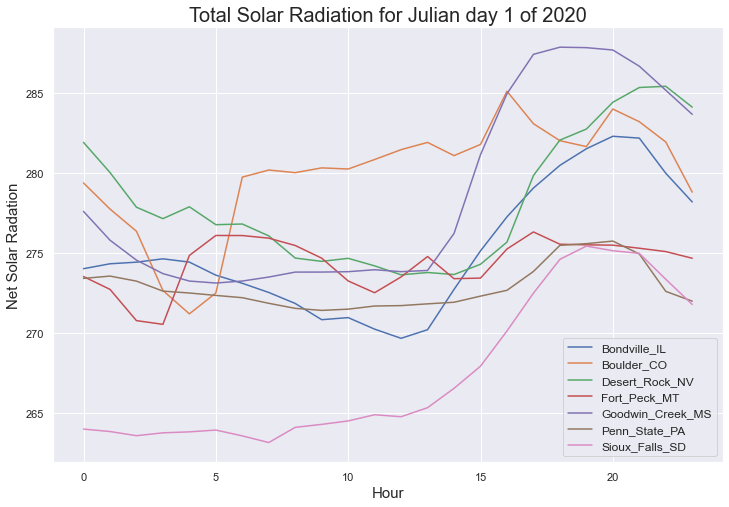

In [13]:
# plt.style.use("darkgrid")
plt.figure(figsize=(12,8))
sns.lineplot(data=surfrad_bon_hr, x=surfrad_bon_hr.index, y='netsolar', hue=None, style=None)
sns.lineplot(data=surfrad_tbl_hr, x=surfrad_bon_hr.index, y='netsolar', hue=None, style=None)
sns.lineplot(data=surfrad_dra_hr, x=surfrad_bon_hr.index, y='netsolar', hue=None, style=None)
sns.lineplot(data=surfrad_fpk_hr, x=surfrad_bon_hr.index, y='netsolar', hue=None, style=None)
sns.lineplot(data=surfrad_gwn_hr, x=surfrad_bon_hr.index, y='netsolar', hue=None, style=None)
sns.lineplot(data=surfrad_psu_hr, x=surfrad_bon_hr.index, y='netsolar', hue=None, style=None)
sns.lineplot(data=surfrad_sxf_hr, x=surfrad_bon_hr.index, y='netsolar', hue=None, style=None)
plt.xlabel('Hour', fontsize=15)
plt.ylabel('Net Solar Radation', fontsize=15)
plt.legend(locations, fontsize=12)
plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

### Read all data and concatenate

In [29]:
def merge_df(filenames, columns):
    '''
    Simple function to merge all the dataframes by year
    '''   
    df_list = []   
    for filename in filenames:                
        df = pd.read_csv(filename, skiprows=1, sep="\s+", names=columns)
        df.drop([0], inplace=True)
        df_list.append(df)
        

    frame = pd.concat(df_list, axis=0, ignore_index=True)
    return frame

In [30]:
import glob

year = 2020
df_all = {}
for location in locations:
    print(f"Starting dataframe collection from {location} ...")
    
    path = f"D:/Machine_Learning/NOAA/surfrad/{location}/{year}/"
    filenames = glob.glob(path + "/*.dat")
    
    df_all[location] = merge_df(filenames, columns_list)
print("Done!")

Starting dataframe collection from Bondville_IL ...
Starting dataframe collection from Boulder_CO ...
Starting dataframe collection from Desert_Rock_NV ...
Starting dataframe collection from Fort_Peck_MT ...
Starting dataframe collection from Goodwin_Creek_MS ...
Starting dataframe collection from Penn_State_PA ...
Starting dataframe collection from Sioux_Falls_SD ...
Done!


In [34]:
df_all['Bondville_IL'].shape

(527039, 28)

In [33]:
df_all['Bondville_IL'].head()

year  jday  month day hour  min     dt     zen  dw_solar  uw_solar  ...  \
0  2020.0   1.0      1   1    0    0  0.000  105.13      -1.2       0.0  ...   
1  2020.0   1.0      1   1    0    1  0.017  105.31      -1.2       0.0  ...   
2  2020.0   1.0      1   1    0    2  0.033  105.50      -1.2       0.0  ...   
3  2020.0   1.0      1   1    0    3  0.050  105.68      -1.2       0.0  ...   
4  2020.0   1.0      1   1    0    4  0.067  105.86      -1.2       0.0  ...   

      uvb  par  netsolar  netir  totalnet  temp      rh  windspd  winddir  \
0  273.91  0.0    273.88    0.0     318.2   0.0  273.36      0.0   273.35   
1  273.91  0.0    273.90    0.0     318.2   0.0  273.36      0.0   273.35   
2  273.92  0.0    273.91    0.0     318.2   0.0  273.36      0.0   273.35   
3  273.93  0.0    273.91    0.0     318.1   0.0  273.36      0.0   273.36   
4  273.93  0.0    273.91    0.0     318.2   0.0  273.36      0.0   273.35   

   pressure  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 28 columns]

In [31]:
for k, v in df_all.items():
    print(k)

Bondville_IL
Boulder_CO
Desert_Rock_NV
Fort_Peck_MT
Goodwin_Creek_MS
Penn_State_PA
Sioux_Falls_SD


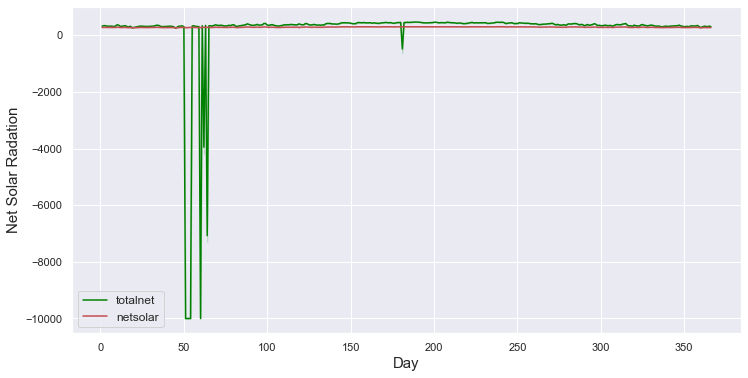

In [369]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='totalnet', color='green')
sns.lineplot(data=df_all['Bondville_IL'], x='jday', y='netsolar', color='r')

plt.xlabel('Day', fontsize=15)
plt.ylabel('Net Solar Radation', fontsize=15)
plt.legend(['totalnet', 'netsolar'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

#### Missing values
The data has lot of missing values labelled as  - 9999.9
It would be easy convert them to 'nan' for later.

<AxesSubplot:xlabel='netsolar', ylabel='totalnet'>

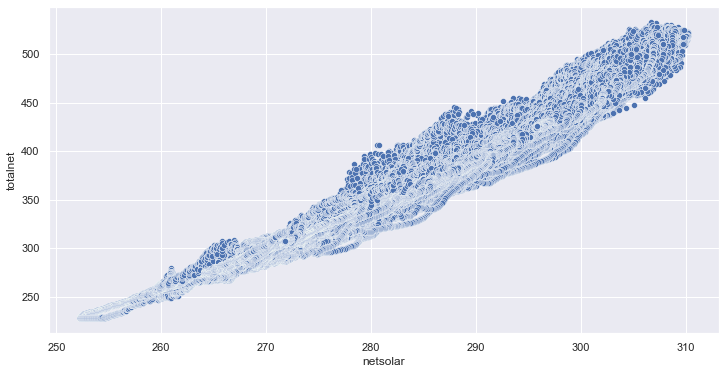

In [396]:
plt.figure(figsize=(12,6))
# df_merge.replace(to_replace=-9999.9, value=np.nan, inplace=True)
sns.scatterplot(data=df_all['Bondville_IL'].replace(to_replace=-9999.9, value=np.nan), x='netsolar', y='totalnet')

We see strong linear relationship between netsolar and totalnet. We can use this to replace the missing value from each others.

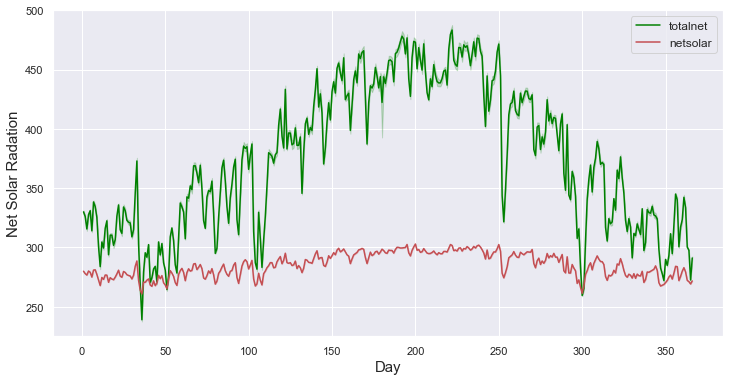

In [370]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Boulder_CO'], x='jday', y='totalnet', color='green')
sns.lineplot(data=df_all['Boulder_CO'], x='jday', y='netsolar', color='r')


plt.xlabel('Day', fontsize=15)
plt.ylabel('Net Solar Radation', fontsize=15)
plt.legend(['totalnet', 'netsolar'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

<AxesSubplot:xlabel='netsolar', ylabel='totalnet'>

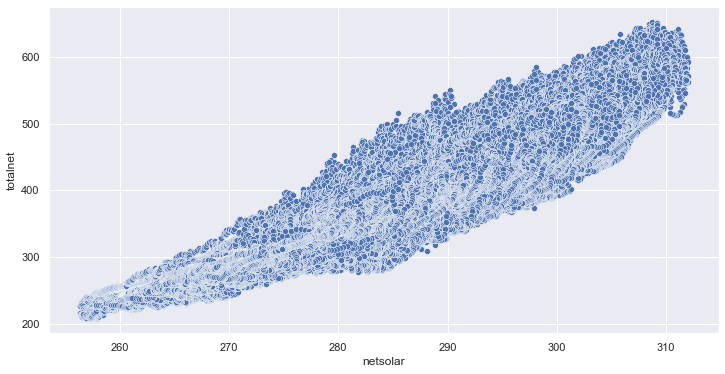

In [388]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_all['Boulder_CO'].loc[df_all['Boulder_CO'].totalnet >0], x='netsolar', y='totalnet')

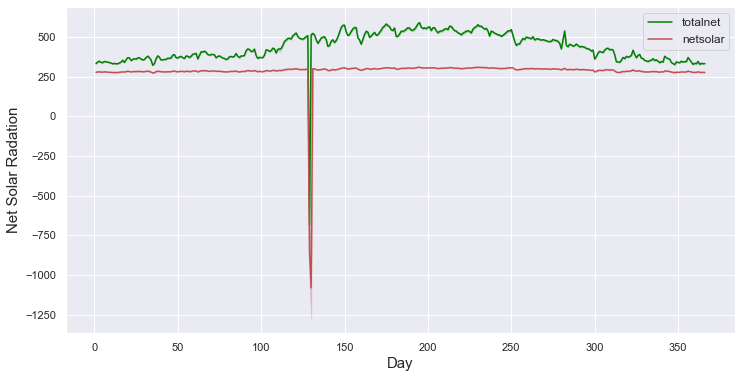

In [371]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Desert_Rock_NV'], x='jday', y='totalnet', color= 'green')
sns.lineplot(data=df_all['Desert_Rock_NV'], x='jday', y='netsolar', color= 'r')

plt.xlabel('Day', fontsize=15)
plt.ylabel('Net Solar Radation', fontsize=15)
plt.legend(['totalnet', 'netsolar'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

<AxesSubplot:xlabel='netsolar', ylabel='totalnet'>

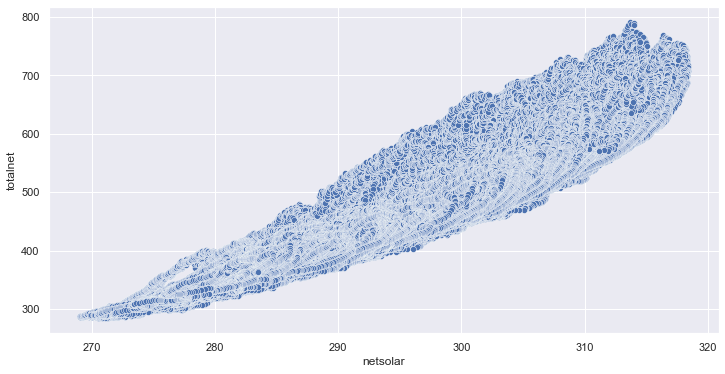

In [397]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_all['Desert_Rock_NV'].replace(to_replace=-9999.9, value=np.nan), x='netsolar', y='totalnet')

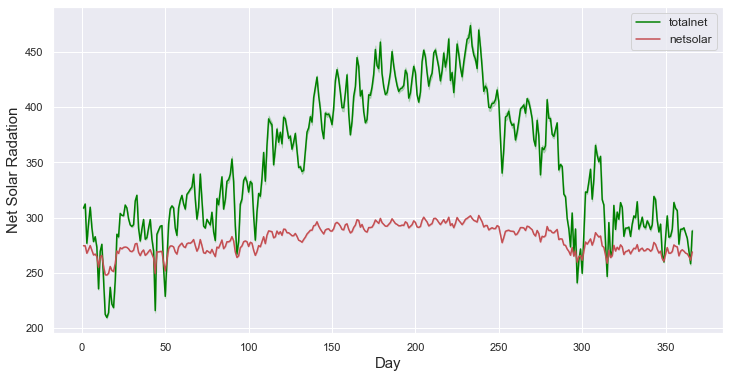

In [372]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Fort_Peck_MT'], x='jday', y='totalnet', color= 'green')
sns.lineplot(data=df_all['Fort_Peck_MT'], x='jday', y='netsolar', color= 'r')

plt.xlabel('Day', fontsize=15)
plt.ylabel('Net Solar Radation', fontsize=15)
plt.legend(['totalnet', 'netsolar'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

<AxesSubplot:xlabel='netsolar', ylabel='totalnet'>

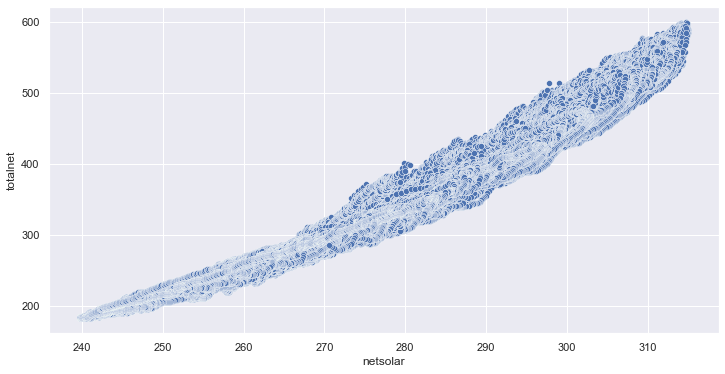

In [381]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_all['Fort_Peck_MT'], x='netsolar', y='totalnet')

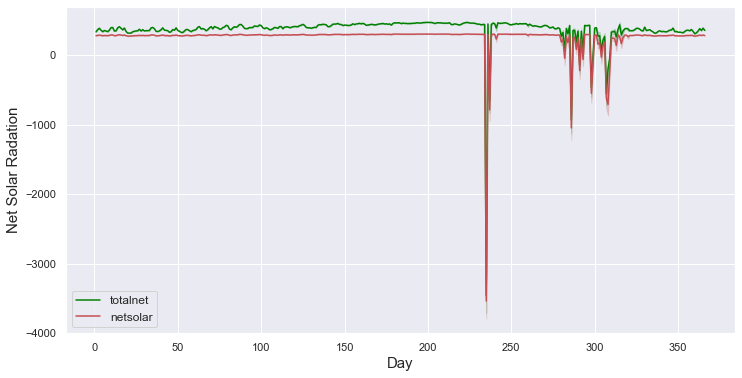

In [373]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Goodwin_Creek_MS'], x='jday', y='totalnet', color='green')
sns.lineplot(data=df_all['Goodwin_Creek_MS'], x='jday', y='netsolar', color='r')

plt.xlabel('Day', fontsize=15)
plt.ylabel('Net Solar Radation', fontsize=15)
plt.legend(['totalnet', 'netsolar'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

<AxesSubplot:xlabel='jday', ylabel='netsolar'>

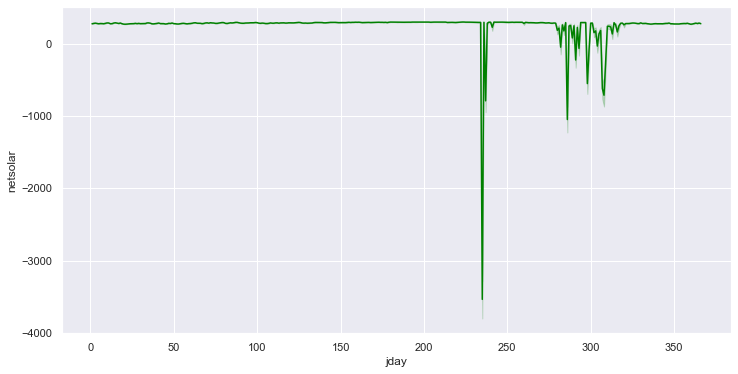

In [409]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Goodwin_Creek_MS'], x='jday', y='netsolar', color='green')

<AxesSubplot:xlabel='netsolar', ylabel='totalnet'>

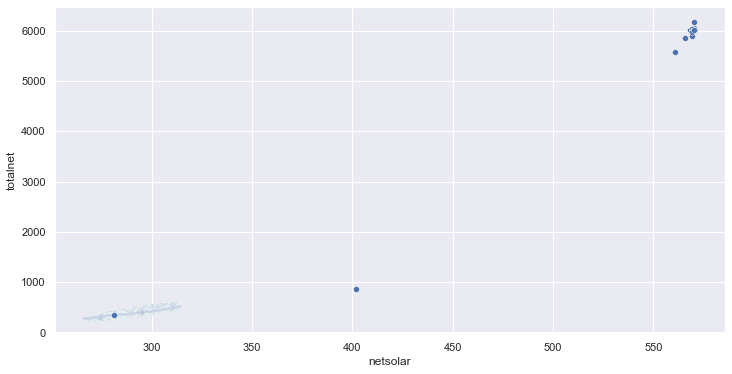

In [398]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_all['Goodwin_Creek_MS'].replace(to_replace=-9999.9, value=np.nan), x='netsolar', y='totalnet')

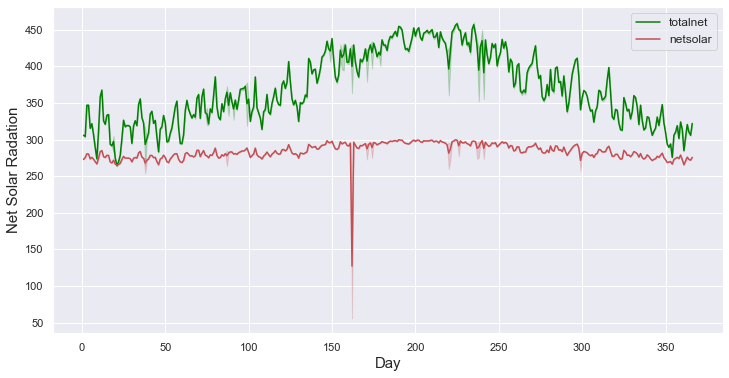

In [374]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Penn_State_PA'], x='jday', y='totalnet', color= 'green')
sns.lineplot(data=df_all['Penn_State_PA'], x='jday', y='netsolar', color= 'r')

plt.xlabel('Day', fontsize=15)
plt.ylabel('Net Solar Radation', fontsize=15)
plt.legend(['totalnet', 'netsolar'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

<AxesSubplot:xlabel='netsolar', ylabel='totalnet'>

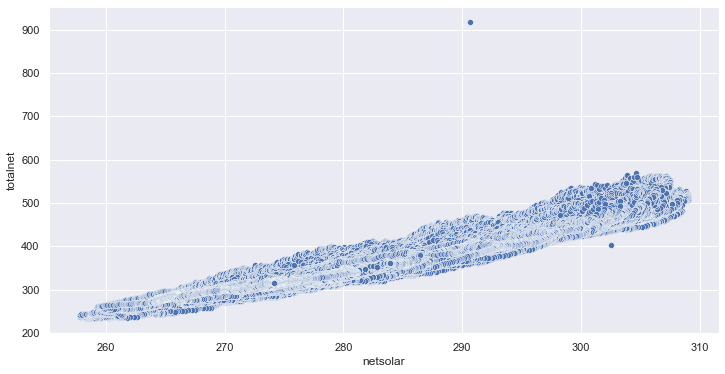

In [399]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_all['Penn_State_PA'].replace(to_replace=-9999.9, value=np.nan), x='netsolar', y='totalnet')

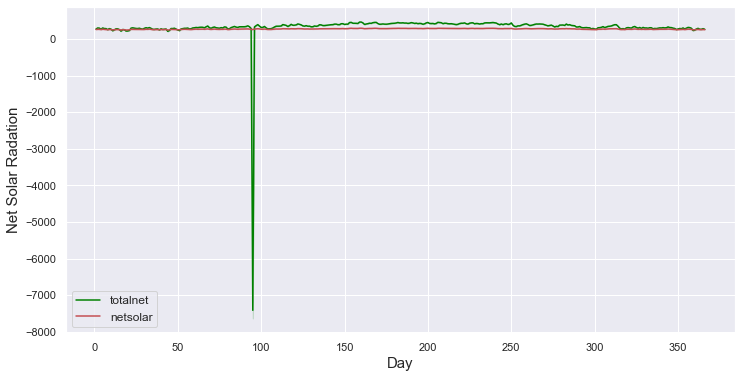

In [375]:
plt.figure(figsize=(12,6))
sns.lineplot(data=df_all['Sioux_Falls_SD'], x='jday', y='totalnet', color= 'green')
sns.lineplot(data=df_all['Sioux_Falls_SD'], x='jday', y='netsolar', color= 'r')

plt.xlabel('Day', fontsize=15)
plt.ylabel('Net Solar Radation', fontsize=15)
plt.legend(['totalnet', 'netsolar'], fontsize=12)
# plt.title('Total Solar Radiation for Julian day 1 of 2020', fontsize=20)
plt.show();

<AxesSubplot:xlabel='netsolar', ylabel='totalnet'>

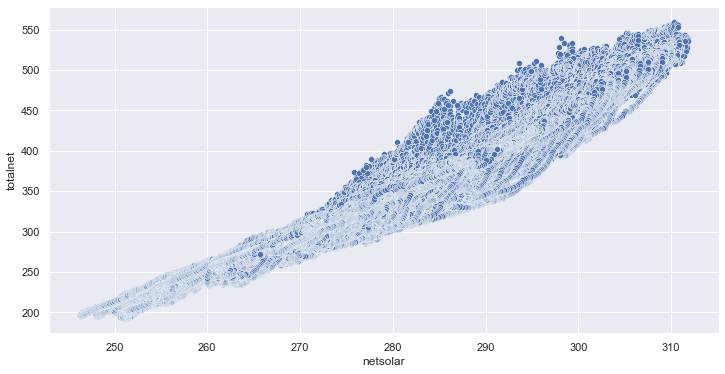

In [400]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df_all['Sioux_Falls_SD'].replace(to_replace=-9999.9, value=np.nan), x='netsolar', y='totalnet')

Large negative 'netsolar' values for:

Desert_Rock_NV
Goodwin_Creek_MS
Penn_State_PA

Large negative 'totalnet'values for:
Bondville_IL
Desert_Rock_NV
Goodwin_Creek_MS
Sioux_Falls_SD

In [404]:
df_all['Sioux_Falls_SD'].drop(columns=['year', 'jday', 'month', 'min', 'dt']).corr()

zen  dw_solar  uw_solar  direct_n   diffuse     dw_ir  \
zen          1.000000 -0.129889 -0.032608 -0.150741 -0.021719 -0.226490   
dw_solar    -0.129889  1.000000 -0.977664  0.223978 -0.215909  0.161260   
uw_solar    -0.032608 -0.977664  1.000000 -0.183207  0.220842 -0.089448   
direct_n    -0.150741  0.223978 -0.183207  1.000000 -0.965480  0.426352   
diffuse     -0.021719 -0.215909  0.220842 -0.965480  1.000000 -0.373354   
dw_ir       -0.226490  0.161260 -0.089448  0.426352 -0.373354  1.000000   
dw_casetemp -0.033428 -0.137796  0.143327 -0.381122  0.415818 -0.897879   
dw_dometemp -0.251971  0.255811 -0.206869  0.944697 -0.914866  0.392058   
uw_irl      -0.022324 -0.216981  0.222017 -0.949965  0.984115 -0.374196   
uw_casetemp -0.054695  0.157345 -0.151131  0.557795 -0.573470  0.234646   
uw_dometemp  0.007041 -0.130285  0.129217 -0.563106  0.578519 -0.230815   
uvb         -0.483650  0.255584 -0.167255  0.069225 -0.023940  0.197957   
par               NaN       NaN       NaN       NaN       NaN       NaN   
netsolar    -0.486290  0.256546 -0.167825  0.070358 -0.024765  0.197067   
netir             NaN       NaN       NaN       NaN       NaN       NaN   
totalnet    -0.092300  0.163700 -0.145541  0.572740 -0.577537  0.254336   
temp         0.007958 -0.126791  0.125536 -0.568507  0.583857 -0.224221   
rh          -0.463035  0.252343 -0.168565  0.066950 -0.024966  0.187062   
windspd           NaN       NaN       NaN       NaN       NaN       NaN   
winddir     -0.470371  0.252170 -0.166396  0.069513 -0.024581  0.189856   
pressure          NaN       NaN       NaN       NaN       NaN       NaN   

             dw_casetemp  dw_dometemp    uw_irl  uw_casetemp  ...       uvb  \
zen            -0.033428    -0.251971 -0.022324    -0.054695  ... -0.483650   
dw_solar       -0.137796     0.255811 -0.216981     0.157345  ...  0.255584   
uw_solar        0.143327    -0.206869  0.222017    -0.151131  ... -0.167255   
direct_n       -0.381122     0.944697 -0.949965     0.557795  ...  0.069225   
diffuse         0.415818    -0.914866  0.984115    -0.573470  ... -0.023940   
dw_ir          -0.897879     0.392058 -0.374196     0.234646  ...  0.197957   
dw_casetemp     1.000000    -0.380830  0.416963    -0.253561  ... -0.065180   
dw_dometemp    -0.380830     1.000000 -0.929634     0.557520  ...  0.139484   
uw_irl          0.416963    -0.929634  1.000000    -0.578117  ... -0.022810   
uw_casetemp    -0.253561     0.557520 -0.578117     1.000000  ...  0.162027   
uw_dometemp     0.248789    -0.549148  0.583219    -0.991273  ... -0.049460   
uvb            -0.065180     0.139484 -0.022810     0.162027  ...  1.000000   
par                  NaN          NaN       NaN          NaN  ...       NaN   
netsolar       -0.065564     0.142772 -0.023620     0.163313  ...  0.999929   
netir                NaN          NaN       NaN          NaN  ...       NaN   
totalnet       -0.245624     0.557538 -0.568202     0.987845  ...  0.193103   
temp            0.241206    -0.541172  0.574557    -0.982210  ... -0.050512   
rh             -0.063686     0.133248 -0.023872     0.162915  ...  0.998786   
windspd              NaN          NaN       NaN          NaN  ...       NaN   
winddir        -0.062494     0.135575 -0.023484     0.162618  ...  0.998941   
pressure             NaN          NaN       NaN          NaN  ...       NaN   

             par  netsolar  netir  totalnet      temp        rh  windspd  \
zen          NaN -0.486290    NaN -0.092300  0.007958 -0.463035      NaN   
dw_solar     NaN  0.256546    NaN  0.163700 -0.126791  0.252343      NaN   
uw_solar     NaN -0.167825    NaN -0.145541  0.125536 -0.168565      NaN   
direct_n     NaN  0.070358    NaN  0.572740 -0.568507  0.066950      NaN   
diffuse      NaN -0.024765    NaN -0.577537  0.583857 -0.024966      NaN   
dw_ir        NaN  0.197067    NaN  0.254336 -0.224221  0.187062      NaN   
dw_casetemp  NaN -0.065564    NaN -0.245624  0.241206 -0.063686      NaN   
dw_dometemp  NaN  0.

#### Lets ouput each dataframe to csv and evaluate in excel

In [407]:
for location in locations:
    print(location)
    df_all[location].replace(to_replace=-9999.9, value=np.nan).to_csv(r'D:/Machine_Learning/NOAA/surfrad/surfrad_' + location + '.csv')

Bondville_IL
Boulder_CO
Desert_Rock_NV
Fort_Peck_MT
Goodwin_Creek_MS
Penn_State_PA
Sioux_Falls_SD


#### Create a function to fill in missing value based on regression

In [432]:
import math

def fill_nan(df, location):
    '''
    Function to derive netsolar from totalnet using linear regression and vice-versa
    '''    
    df = df.replace(to_replace=-9999.9, value=np.nan)
    
    if location == 'Bondville_IL':
        df['totalnet_fill'] = 0.77 * df.netsolar - 22 
        df['netsolar_fill'] = (df.totalnet + 22)/0.77        
        
    elif location == 'Boulder_CO':
        df['totalnet_fill'] = 0.7 * df.netsolar - 42  
        df['netsolar_fill'] = (df.totalnet + 42)/0.7
        
    elif location == 'Desert_Rock_NV':
        df['totalnet_fill'] = 0.6 * df.netsolar - 48
        df['netsolar_fill'] = (df.totalnet + 48)/0.6
    
    elif location == 'Fort_Peck_MT':
        df['totalnet_fill'] = 0.75 * df.netsolar - 33
        df['netsolar_fill'] = (df.totalnet + 33)/0.75
        
    elif location == 'Goodwin_Creek_MS':
        df['totalnet_fill'] = 0.76 * df.netsolar - 17
        df['netsolar_fill'] = (df.totalnet + 17)/0.76
        
    elif location == 'Penn_State_PA':
        df['totalnet_fill'] = 0.75 * df.netsolar - 21 
        df['netsolar_fill'] = (df.totalnet + 21)/0.75
        
    else:
        df['totalnet_fill'] = 0.78 * df.netsolar - 29
        df['netsolar_fill'] = (df.totalnet + 29)/0.78
        
    df['totalnet'] = df['totalnet'].fillna(df['totalnet_fill'])
    df['netsolar'] = df['netsolar'].fillna(df['netsolar_fill'])
    
    return df

In [88]:
columns_to_drop = ['zen', 'dw_solar', 'uw_solar', 'direct_n', 'diffuse', 'dw_ir', 'dw_casetemp', 
                   'dw_dometemp', 'uw_irl', 'uw_casetemp', 'uw_dometemp', 'uvb', 'par', 'netsolar',
                   'netir', 'temp', 'rh', 'windspd', 'winddir', 'pressure']

In [198]:
def clean_df(df, new_col):
    
    columns_to_drop = ['zen', 'dw_solar', 'uw_solar', 'direct_n', 'diffuse', 'dw_ir', 'dw_casetemp', 
                   'dw_dometemp', 'uw_irl', 'uw_casetemp', 'uw_dometemp', 'uvb', 'par', 'netsolar',
                   'netir', 'temp', 'rh', 'windspd', 'winddir', 'pressure']
    
    df = df.drop(columns=columns_to_drop)
    df = df.rename(columns={'totalnet': str(new_col)})
    
    # Create datetime index
    df['year'] = df['year'].astype(int)
    df['jday'] = df['jday'].astype(int)
    df['day'] = df['day'].astype(int)
    df['hour'] = df['hour'].astype(int)
    df['min'] = df['min'].astype(int)
    
    df['time'] = pd.to_datetime(df['hour'].astype(str) + ':' + df['min'].astype(str), 
                                 format='%H:%M').dt.time
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']]) + pd.to_timedelta(df['time'].astype(str))
    df = df.set_index(pd.DatetimeIndex(df['datetime'])).drop(
        columns=['year', 'jday', 'month', 'day', 'hour', 'min', 'dt', 'time', 'datetime'])
    
    return df 

In [ ]:
def datetimeformat(df):
    df['time'] = pd.to_datetime(df['hour'].astype(str) + ':' + df['min'].astype(str), 
                                 format='%H:%M').dt.time
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day']]) + pd.to_timedelta(df['time'].astype(str))
    df = df.set_index(pd.DatetimeIndex(df['datetime'])).drop(
        columns=['year', 'jday', 'month', 'day', 'hour', 'min', 'dt', 'time', 'datetime'])
    
    return df

In [232]:
df_bon = clean_df(df_all['Bondville_IL'], new_col = 'totalnet_bon')
df_co = clean_df(df_all['Boulder_CO'], new_col = 'totalnet_co')
df_nv = clean_df(df_all['Desert_Rock_NV'], new_col = 'totalnet_nv')
df_mt = clean_df(df_all['Fort_Peck_MT'], new_col = 'totalnet_mt')
df_ms = clean_df(df_all['Goodwin_Creek_MS'], new_col = 'totalnet_ms')
df_pa = clean_df(df_all['Penn_State_PA'], new_col = 'totalnet_pa')
df_sd = clean_df(df_all['Sioux_Falls_SD'], new_col = 'totalnet_sd')

In [233]:
df_bon.head()

totalnet_bon
datetime                         
2020-01-01 00:00:00         318.2
2020-01-01 00:01:00         318.2
2020-01-01 00:02:00         318.2
2020-01-01 00:03:00         318.1
2020-01-01 00:04:00         318.2

In [235]:
df_bon['key'] = df_bon.index
df_co['key'] = df_co.index
df_nv['key'] = df_nv.index
df_mt['key'] = df_mt.index
df_ms['key'] = df_ms.index
df_pa['key'] = df_pa.index
df_sd['key'] = df_sd.index

In [237]:
df_nv.head()

totalnet_nv                 key
datetime                                            
2020-01-01 00:00:00        354.7 2020-01-01 00:00:00
2020-01-01 00:01:00        354.0 2020-01-01 00:01:00
2020-01-01 00:02:00        353.4 2020-01-01 00:02:00
2020-01-01 00:03:00        353.0 2020-01-01 00:03:00
2020-01-01 00:04:00        352.5 2020-01-01 00:04:00

In [214]:
df_bon.reset_index(inplace=True)
df_co.reset_index(inplace=True)
df_nv.reset_index(inplace=True)
df_mt.reset_index(inplace=True)
df_ms.reset_index(inplace=True)
df_pa.reset_index(inplace=True)
df_sd.reset_index(inplace=True)

In [242]:
df_merge1 = pd.merge(df_bon, df_co, on='key')
df_merge2 = pd.merge(df_merge1, df_nv, on='key')
df_merge3 = pd.merge(df_merge2, df_mt, on='key')
df_merge4 = pd.merge(df_merge3, df_ms, on='key')
df_merge5 = pd.merge(df_merge4, df_pa, on='key')
df_merge = pd.merge(df_merge5, df_sd, on='key')
# df_merge.drop(columns=['key']).head()
df_merge.set_index(pd.DatetimeIndex(df_merge['key'])).drop(columns=['key']).head()

totalnet_bon  totalnet_co  totalnet_nv  totalnet_mt  \
key                                                                        
2020-01-01 00:00:00         318.2        323.1        354.7        301.7   
2020-01-01 00:01:00         318.2        322.1        354.0        302.2   
2020-01-01 00:02:00         318.2        322.6        353.4        302.0   
2020-01-01 00:03:00         318.1        320.8        353.0        302.2   
2020-01-01 00:04:00         318.2        322.0        352.5        302.4   

                     totalnet_ms  totalnet_pa  totalnet_sd  
key                                                         
2020-01-01 00:00:00        315.7        316.3        256.1  
2020-01-01 00:01:00        315.4        315.9        257.0  
2020-01-01 00:02:00        315.5        316.6        257.5  
2020-01-01 00:03:00        316.2        315.9        257.7  
2020-01-01 00:04:00        316.3        315.9        257.8

In [229]:
df_merge['datetime'] = pd.to_datetime(df_merge['datetime'])
df_merge.set_index(pd.DatetimeIndex(df_merge['datetime'])).drop(columns=['datetime']).head()

totalnet_bon  totalnet_co  totalnet_nv  totalnet_mt  \
datetime                                                                   
2020-01-01 00:00:00         318.2        323.1        354.7        301.7   
2020-01-01 00:01:00         318.2        322.1        354.0        302.2   
2020-01-01 00:02:00         318.2        322.6        353.4        302.0   
2020-01-01 00:03:00         318.1        320.8        353.0        302.2   
2020-01-01 00:04:00         318.2        322.0        352.5        302.4   

                     totalnet_ms  totalnet_pa  totalnet_sd  
datetime                                                    
2020-01-01 00:00:00        315.7        316.3        256.1  
2020-01-01 00:01:00        315.4        315.9        257.0  
2020-01-01 00:02:00        315.5        316.6        257.5  
2020-01-01 00:03:00        316.2        315.9        257.7  
2020-01-01 00:04:00        316.3        315.9        257.8

In [293]:
df_merge.replace(to_replace=-9999.9, value=np.nan, inplace=True)
df_merge['totalnet_sd'].value_counts()

In [308]:
df_merge['totalnet_bon'].isna().sum()

8966

In [307]:
df_merge['totalnet_bon'].interpolate(method='polynomial', order=2).isna().sum()

0

<AxesSubplot:ylabel='totalnet_bon'>

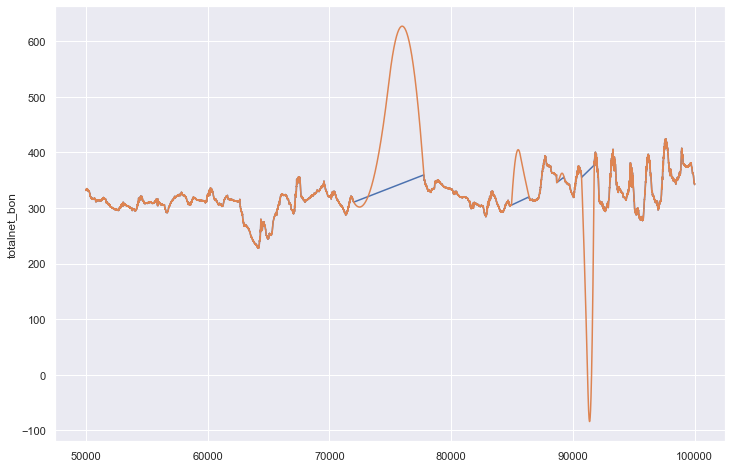

In [310]:
plt.figure(figsize=(12,8))
sns.lineplot(data=df_merge.totalnet_bon.iloc[50000:100000])
sns.lineplot(data=df_merge['totalnet_bon'].interpolate(method='polynomial', order=2).iloc[50000:100000])

In [311]:
df_all['Bondville_IL'].head()

year  jday  month day hour  min     dt     zen  dw_solar  uw_solar  ...  \
0  2020.0   1.0      1   1    0    0  0.000  105.13      -1.2       0.0  ...   
1  2020.0   1.0      1   1    0    1  0.017  105.31      -1.2       0.0  ...   
2  2020.0   1.0      1   1    0    2  0.033  105.50      -1.2       0.0  ...   
3  2020.0   1.0      1   1    0    3  0.050  105.68      -1.2       0.0  ...   
4  2020.0   1.0      1   1    0    4  0.067  105.86      -1.2       0.0  ...   

      uvb  par  netsolar  netir  totalnet  temp      rh  windspd  winddir  \
0  273.91  0.0    273.88    0.0     318.2   0.0  273.36      0.0   273.35   
1  273.91  0.0    273.90    0.0     318.2   0.0  273.36      0.0   273.35   
2  273.92  0.0    273.91    0.0     318.2   0.0  273.36      0.0   273.35   
3  273.93  0.0    273.91    0.0     318.1   0.0  273.36      0.0   273.36   
4  273.93  0.0    273.91    0.0     318.2   0.0  273.36      0.0   273.35   

   pressure  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 28 columns]

In [316]:
temp = df_all['Bondville_IL']
temp.head()

year  jday  month day hour  min     dt     zen  dw_solar  uw_solar  ...  \
0  2020.0   1.0      1   1    0    0  0.000  105.13      -1.2       0.0  ...   
1  2020.0   1.0      1   1    0    1  0.017  105.31      -1.2       0.0  ...   
2  2020.0   1.0      1   1    0    2  0.033  105.50      -1.2       0.0  ...   
3  2020.0   1.0      1   1    0    3  0.050  105.68      -1.2       0.0  ...   
4  2020.0   1.0      1   1    0    4  0.067  105.86      -1.2       0.0  ...   

      uvb  par  netsolar  netir  totalnet  temp      rh  windspd  winddir  \
0  273.91  0.0    273.88    0.0     318.2   0.0  273.36      0.0   273.35   
1  273.91  0.0    273.90    0.0     318.2   0.0  273.36      0.0   273.35   
2  273.92  0.0    273.91    0.0     318.2   0.0  273.36      0.0   273.35   
3  273.93  0.0    273.91    0.0     318.1   0.0  273.36      0.0   273.36   
4  273.93  0.0    273.91    0.0     318.2   0.0  273.36      0.0   273.35   

   pressure  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  

[5 rows x 28 columns]

In [187]:
df_bon.head()

year  jday  month  day  hour  min     dt  totalnet_bon      time  \
0  2020     1      1    1     0    0  0.000         318.2  00:00:00   
1  2020     1      1    1     0    1  0.017         318.2  00:01:00   
2  2020     1      1    1     0    2  0.033         318.2  00:02:00   
3  2020     1      1    1     0    3  0.050         318.1  00:03:00   
4  2020     1      1    1     0    4  0.067         318.2  00:04:00   

             datetime  
0 2020-01-01 00:00:00  
1 2020-01-01 00:01:00  
2 2020-01-01 00:02:00  
3 2020-01-01 00:03:00  
4 2020-01-01 00:04:00